# Rain in Australia
The dataset presented in this project is taken from the <a href="https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/version/1">Rain in Australia</a> dataset on Kaggle. The data contains information about the certain date, including, but not limited to, temperature measures, wind speed and directions, humidity, pressure, etc.

While the dataset can be used to solve the regression problem of predicting the amount of rain tomorrow, **this project aims to train a binary classification system to predict whether or not it will rain tomorrow**.

In [1]:
import numpy as np
import pandas as pd
from pandas import get_dummies
import urllib

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

---
## Data Understanding and Exploration

In [3]:
url = "https://rattle.togaware.com/weatherAUS.csv"

df = pd.read_csv(url)

In [4]:
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No


By just taking a peek at the first 3 rows of data, we can already see that there are missing values.

The 'RainTomorrow' column is our labels in this dataset. The 'RISK_MM' column directly correlates to the 'RainTomorrow' column, so it will not be used in building our models.

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,175873.000000,176112.000000,173891.000000,90926.000000,83237.000000,165091.000000,175271.000000,172712.000000,174800.000000,171650.000000,158813.000000,158826.000000,104389.000000,99201.000000,175779.000000,172637.000000,173890.000000
mean,12.119628,23.320127,2.242319,5.525063,7.652490,40.169052,14.043487,18.707374,68.277002,50.727480,1017.793518,1015.369631,4.525017,4.544662,16.992242,21.781370,2.242342
std,6.446585,7.164368,8.381144,4.193728,3.760754,13.607072,8.908518,8.782353,19.464452,21.012598,7.049405,6.999437,2.893142,2.742086,6.538459,7.004553,8.381037
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,7.500000,18.000000,0.000000,2.700000,4.900000,31.000000,7.000000,13.000000,56.000000,35.000000,1013.100000,1010.600000,1.000000,2.000000,12.300000,16.700000,0.000000
50%,11.900000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.800000,1015.300000,5.000000,5.000000,16.700000,21.200000,0.000000
75%,16.800000,28.300000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.600000,1020.200000,7.000000,7.000000,21.600000,26.500000,0.600000
max,33.900000,48.900000,474.000000,133.900000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,48.200000,474.000000


#### Visual Represenation of Numeric Features

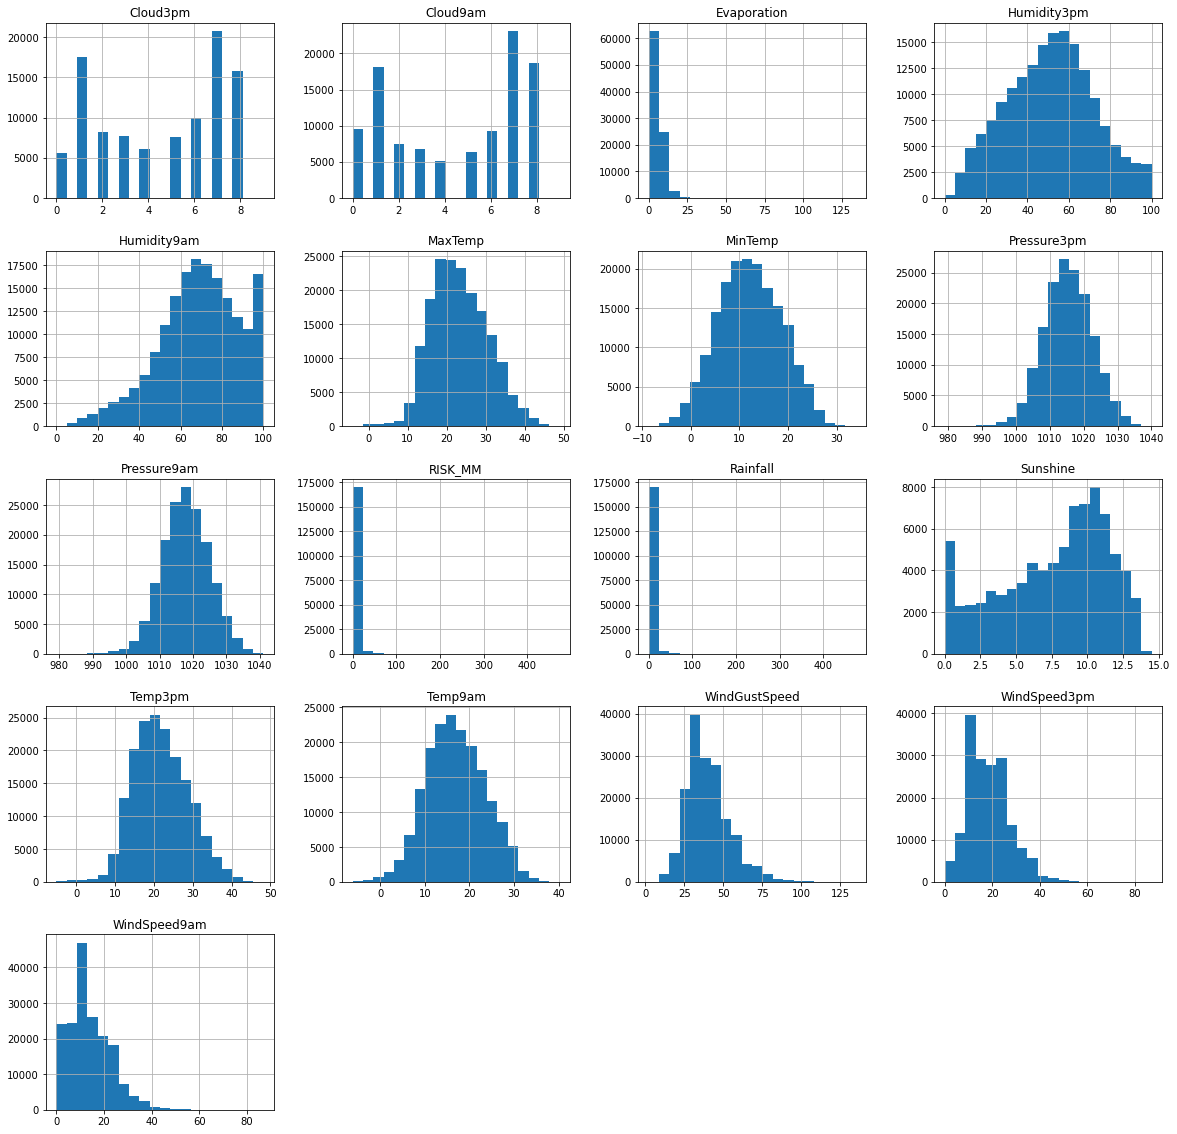

In [6]:
# Plot numeric features in histograms
df.hist(figsize=(20,20), grid=True, layout=(5,4), bins=20);

#### Check for Missing Values

In [7]:
null_count = df.isnull().sum()
null_count

Date                 0
Location             0
MinTemp           2393
MaxTemp           2154
Rainfall          4375
Evaporation      87340
Sunshine         95029
WindGustDir      13270
WindGustSpeed    13175
WindDir9am       13638
WindDir3pm        6798
WindSpeed9am      2995
WindSpeed3pm      5554
Humidity9am       3466
Humidity3pm       6616
Pressure9am      19453
Pressure3pm      19440
Cloud9am         73877
Cloud3pm         79065
Temp9am           2487
Temp3pm           5629
RainToday         4375
RISK_MM           4376
RainTomorrow      4376
dtype: int64

In [8]:
data_tuples = list(zip(df.columns.values, null_count))
df_null = pd.DataFrame(data_tuples, 
                       columns=['Feature','Count of Missing Values']).sort_values(by=['Count of Missing Values'], 
                                                                                  ascending=False)
df_null

,Feature,Count of Missing Values
6,Sunshine,95029
5,Evaporation,87340
18,Cloud3pm,79065
17,Cloud9am,73877
15,Pressure9am,19453
16,Pressure3pm,19440
9,WindDir9am,13638
7,WindGustDir,13270
8,WindGustSpeed,13175
10,WindDir3pm,6798


The above cell shows the null counts for each feature. We may want to calculate this by percentage, which should all us to make better decision in determining which features over a threshold percentage of missing values should be dropped. 

In [9]:
row_count = len(df['Date'])
row_count

178266

By counting the date, this lets us know the total number of records in this dataset. We will use this to calculate the percentage of missing values in each feature.

In [10]:
null_percent = [X / row_count for X in null_count]

data_tuples = list(zip(df.columns.values, null_percent))
df_null_percent = pd.DataFrame(data_tuples, 
                               columns=['Feature','% of Missing Values']).sort_values(by=['% of Missing Values'], 
                                                                                          ascending=False)
df_null_percent

,Feature,% of Missing Values
6,Sunshine,0.533074
5,Evaporation,0.489942
18,Cloud3pm,0.443523
17,Cloud9am,0.414420
15,Pressure9am,0.109123
16,Pressure3pm,0.109051
9,WindDir9am,0.076504
7,WindGustDir,0.074439
8,WindGustSpeed,0.073906
10,WindDir3pm,0.038134


We can see that the first 4 columns has more than 40% of missing values, so we should just drop them. The 'Date' and 'Location' columns, on the other hand, should be irrelevant to our predictions, because the problem we are trying to solve is not location and date specific. Again, the 'RISK_MM' column directly correlates to our labels, so we can drop it as well in the data preprocessing step.

---
## Data Preprocessing
#### Removing Irrelevant Columns and Dropping Nulls

In [11]:
# Drop columns mentioned above
labels = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Location', 'Date', 'RISK_MM']
df = df.drop(columns=labels, axis=1)

In [12]:
# Drop data with null values
df = df.dropna(how='any')

In [13]:
df.shape

(137751, 17)

After dropping data with missing values, we are still left with more than 137k rows of data.

#### One-hot Encoding

In [14]:
# Select features by type (numeric vs. nominal/catergorical)
num_attrib = df.select_dtypes(include=[np.number]).columns
cat_attrib = df.select_dtypes(include=[np.object]).columns

In [15]:
num_attrib

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [16]:
cat_attrib

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

Before we do one-hot encoding on the categorical features, I think it's better to convert the 'yes/no' values in the 'RainToday' and 'RainTomorrow' into 0's and 1's, as we will be using the 'RainTomorrow' column as our label in the later section.

In [17]:
df['RainToday'].replace({'Yes':1, 'No':0}, inplace=True)
df['RainTomorrow'].replace({'Yes':1, 'No':0}, inplace=True)

In [18]:
cat_attrib = df.select_dtypes(include=[np.object]).columns
cat_attrib

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [19]:
df = pd.get_dummies(df, columns=cat_attrib, drop_first=True)

In [20]:
df.head(3)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1


#### Standard Scaling

In [21]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [22]:
sc = StandardScaler()

# Scale the dataset
X = sc.fit_transform(X);

---
## Training the Model - Logistic Regression

In [23]:
# Split 80% of the data for training and leave out 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train);

In [25]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [26]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE: ", train_mse)
print("Test MSE: ", test_mse)

Train MSE:  0.14491833030852994
Test MSE:  0.14445936626619724


In [27]:
accuracy_score(y_train, y_train_pred)

0.85508166969147

In [28]:
accuracy_score(y_test, y_test_pred)

0.8555406337338027

In [29]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     86715
           1       0.73      0.50      0.60     23485

    accuracy                           0.86    110200
   macro avg       0.80      0.73      0.75    110200
weighted avg       0.85      0.86      0.84    110200



In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     21698
           1       0.73      0.51      0.60      5853

    accuracy                           0.86     27551
   macro avg       0.80      0.73      0.76     27551
weighted avg       0.85      0.86      0.85     27551



From the MSE and accuracy score evaluation, we can observe that the logistic regression model's performance is consistent on both the training and testing set, meaning that there's no overfitting. The classification report shows an overview of the model's precision, recall, and F1-score. We can see that the model does well on both precision and recall in classifying that it will rain tomorrow (class 0), but it scores low on those for not raining (class 1).

---
## Training the Model - Random Forest Classifier

In [31]:
rfc = RandomForestClassifier(n_estimators=100, max_leaf_nodes=1000, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=1000, random_state=42)

In [32]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [33]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE: ", train_mse)
print("Test MSE: ", test_mse)

Train MSE:  0.11983666061705989
Test MSE:  0.14057565968567384


In [34]:
accuracy_score(y_train, y_train_pred)

0.8801633393829401

In [35]:
accuracy_score(y_test, y_test_pred)

0.8594243403143261

In [36]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     86715
           1       0.86      0.52      0.65     23485

    accuracy                           0.88    110200
   macro avg       0.87      0.75      0.79    110200
weighted avg       0.88      0.88      0.87    110200



In [37]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92     21698
           1       0.77      0.48      0.59      5853

    accuracy                           0.86     27551
   macro avg       0.82      0.72      0.75     27551
weighted avg       0.85      0.86      0.85     27551



From the MSE and accuracy score above, we can observe that the random forest classifier performs slightly better (more accurate by ~2%) in classifying instances from the training set than those from the testing set. The difference could come from a little overfitting on the training set, but it is not significant. What's worth noting is that the classifier has a much higher precision for class 1 on the training set, by about 0.1 in comparison to the predictions on the testing set. This could come from the fact that the model overfits on the training set.

#### Brief Conclusion
Both the logistic regression and random forest model return an approximately 85~86% accuracy (as well as a similar precision, recall, and F1-score) on the testing set. Their MSE on training and testing set are also similar, around 0.14 for each. However, considering the computation time, the random forest classifier takes longer to train and predict, and thus the logistic regression model is the better one here.